# Introduction
In Part V, we will use machine learning techniques to predict whether a booking will lead to a cancellation. The process goes like this: 

![MachineLearningProcess](https://uplevelsg.s3-ap-southeast-1.amazonaws.com/CommonAssets/MachineLearningProcess.png)

We put this section on all of the projects in UpLevel so bear with us if you've seen this before. 

Generally, the machine learning process has five parts:
1. <strong>Split your data into train and test set</strong>
2. <strong>Model creation</strong>
<br>
Import your models from sklearn and instantiate them (assign model object to a variable)
3. <strong>model fitting</strong>
<br>
Fit your training data into the model and train train train
4. <strong>model prediction</strong>
<br>
Make a set of predictions using your test data, and
5. <strong>Model assessment</strong>
<br>
Compare your predictions with ground truth in test data

Highly recommended readings:
1. [Important] https://scipy-lectures.org/packages/scikit-learn/index.html
2. https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
3. https://scikit-learn.org/stable/tutorial/basic/tutorial.html

### Step 1: Import your libraries
We will be using models from sklearn - a popular machine learning library. However, we won't import everything from sklearn and take just what we need. 

We'll need to import plotting libraries to plot our predictions against the ground truth (test data). 

Import the following:
- pandas as pd

In [1]:
# Step 1: Import pandas

import pandas as pd

### Step 2: Read the CSVs from Part IV as DataFrames
Read the three cleaned and engineered DataFrames from Part IV.

In [2]:
# Step 2: Read the CSVs from Part IV as DataFrames

h1_h2 = pd.read_csv("H1+H2_dummified.csv")
h1 = pd.read_csv("H1_dummified.csv")
h2 = pd.read_csv("H2_dummified.csv")

### Step 3: Import machine learning libraries
Time to import other libraries. We hope you've taken a look at the two articles at the start of this notebook because it'll be useful. 

Import the following libraries and methods:
1. train_test_split - sklearn.model_selection
2. DummyClassifier - sklearn.dummy
3. LogisticRegression - sklearn.linear_model
4. DecisionTreeClassifier - sklearn.tree
5. RandomForestClassifier - sklearn.ensemble
6. GradientBoostingClassifier - sklearn.ensemble
7. f1_score - sklearn.metrics
8. confusion_matrix - sklearn.metrics

We're performing classification tasks throughout this Part. Feel free to add any other models that you'd like to try.

In [16]:
# Step 3: Import the machine learning libraries

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Modelling for H1
First, we'll work with H1 dataset and train a classification model to predict IsCanceled for a booking.

### Step 4: Prepare your independent and dependent variables for H1
At this point, let's prepare our indepedent and dependent variables for H1 first.
1. Declare a variable, and assign your independent variables to it - everything except IsCanceled
2. Declare a variable, and assign only values from IsCanceled column

In [23]:
# Step 4: Prepare your independent and dependent variables

dvar = h1.drop("IsCanceled", axis=1) 
ivar = h1["IsCanceled"]

### Step 5: Split your independent and dependent variables into train and test sets
Split your data into two parts: 80% for train, and 20% for test. 

Since our data is imbalanced, make sure you stratify your dataset as well when you split.

In [30]:
# Step 5: Split your data into train and test sets

dvar_train, dvar_test, ivar_train, ivar_test = train_test_split(dvar, ivar, stratify=ivar)

### Step 6: Train a machine learning model
After splitting the data, let's begin with training a machine learning model. 

This is what you'll need to do:
1. Start with a model
2. Declare a variable, and store your model in it (don't forget to use brackets)
3. Fit your training data into the instantiated model
4. Declare a variable that contains predictions from the model you just trained, using the train dataset (X_test)
5. Compare the prediction with the actual result (y_test) with f1_score and confusion matrix

Also, the recommended readings will be very helpful.

Let's start with the DummyClassifier to establish a baseline. This will be useful as we train other models. 

In [34]:
# Step 6a: Declare a variable to store the model
dcls = DummyClassifier()
# Step 6b: Fit your train dataset
dcls.fit(dvar_train, ivar_train)
# Step 6c: Declare a variable and store your predictions that you make with your model using X test data
y_pred = dcls.predict(dvar_test)
y_true = ivar_test
# Step 6d: Print the f1_score between y_test and your prediction
f1_score(y_true, y_pred)
# Step 6e: Print the confusion matrix between y_test and your prediction
confusion_matrix(y_true, y_pred)

/Users/raulcardenas/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


array([[5195, 2040],
       [2010,  770]])

### Interpreting the f1_score and confusion matrix
At Step 6d and 6e, we looked at the f1_score and confusion_matrix respectively.

Generally, the higher the f1_score the better since the metric rewards correct classifications and punishes misclassifications. 

How about the business impact of your classification tasks? Let's take a look at the confusion matrix.

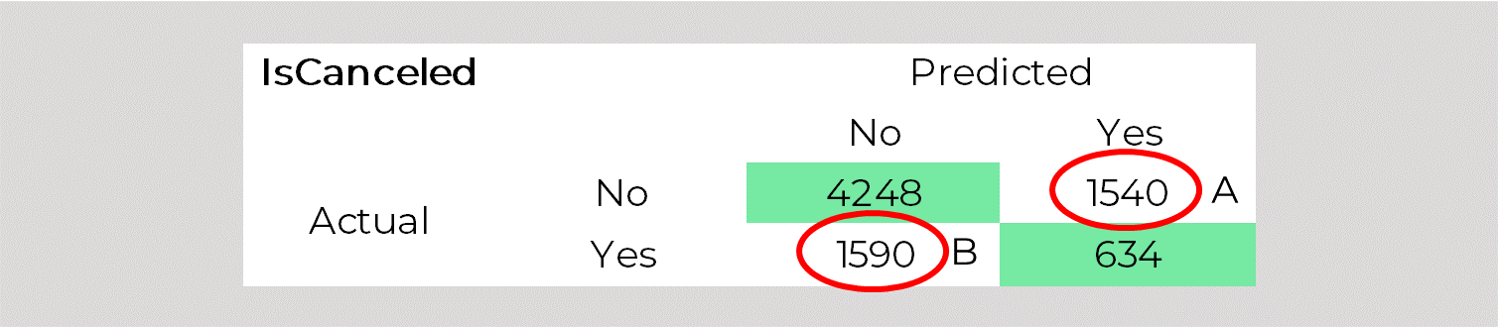

From a business standpoint, which is worse?
- A booking that you predicted as a cancellation, but actually the person didn't cancel (A)
- A booking that you predicted as not a cancellation, but actually the person cancelled (B)

Ideally, we'll try to move the numbers from A to the left, and B to the right - we'll aim to minimize both quantities.

### Step 7: Repeat Step 6 with LogisticRegression
Now that we have established a baseline, let's model with a LogisticRegression. 

Take note that if you use the default parameters, you'd run into a warning. Remove the warning by changing the max_iter parameter to a higher number, i.e. experiment with numbers >=1000.

In [7]:
# Step 7a: Declare a variable to store the LogisticRegression model

# Step 7b: Fit your train dataset

# Step 7c: Declare a variable and store your predictions that you make with your model using X test data

# Step 7d: Print the f1_score between y_test and your prediction

# Step 7e: Print the confusion matrix between y_test and your prediction


### Step 8: Train DecisionTreeClassifier
Let's do a DecisionTreeClassifier next. At this point onwards it's more or less training models to figure out what works best in predicting IsCanceled. 

In [8]:
# Step 8a: Declare a variable to store the DecisionTreeClassifier

# Step 8b: Fit your train dataset

# Step 8c: Declare a variable and store your predictions that you make with your model using X test data

# Step 8d: Print the f1_score between y_test and your prediction

# Step 8e: Print the confusion matrix between y_test and your prediction


### Step 9: Do RandomForestClassifier next

In [9]:
# Step 9: Train and assess a RandomForestClassifier model

### Step 10: Try a few more models 
Give a few more models a try, e.g., gradient boost, XGBoost, catboost, etc.

Mix and match it up and see how it goes! 

In [10]:
# Step 10: Try a few more ML models

### Step 11: Create a DataFrame for feature importance
After you present the model to your boss and show off the accuracy, he rubs his chin and asks:
<blockquote>What were the most useful features in your model?</blockquote>
You'll need to figure out which features were used using the .feature_importances_ of your model.

You can either plot the feature importance out, or prepare it as a sorted DataFrame.

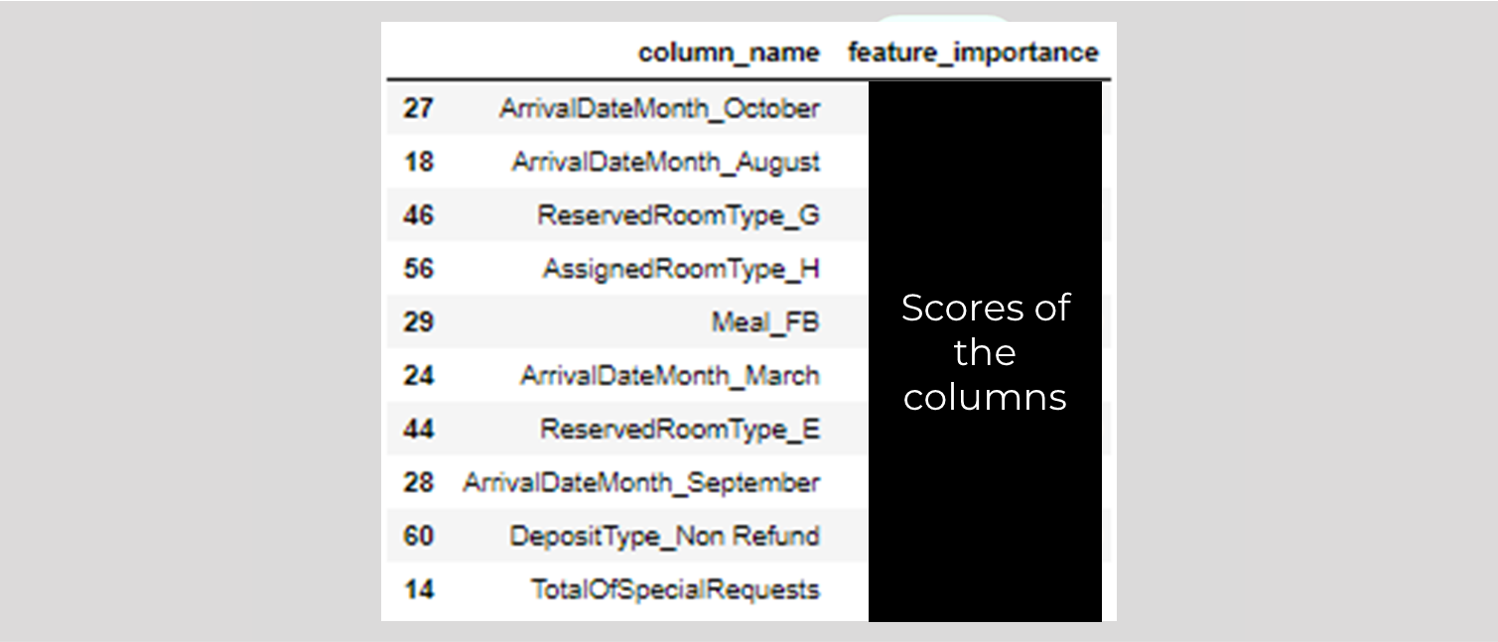

Once you figure it out, think about why it's an important feature in relation to the dataset.

<details>
    <summary><font color = 'green'>Click here to see if your top feature importance is the same as ours</font></summary>
    <div>
        <strong>It's LeadTime. Which makes sense, if you think about it. The longer the LeadTime, the more likely it is that the booking will be cancelled.</strong>
    </div>
</details>

In [11]:
# Step 11: Create a DataFrame for feature_importances_ of your model

## Modelling for H2
Now that we're done with H1, let's train a model for H2. 

### Step 12: Train a model for H2
Repeat what you did for H1, and see if your best model's feature importance is the same. 

In [12]:
# Step 12: Repeat Steps 4-11 for H2

## Modelling for H1+H2
We have done H1 and H2 separately, and we have obtained models that work with the respective source dataset. What if we want a general model that can work with both kinds of hotel datasets? 

This will be interesting because a generalized model is definitely more useful that a specific one.

In [13]:
# Step 13: Repeat Steps 4-11 for H1+H2

## Optional: Train a model that can predict whether a booking source
One day, your boss might ask:
<blockquote>How can we tell the difference between resort (H1) and city (H2) hotels?</blockquote>

This is a bit frivolous, but you can also train a model to predict whether a booking was from a resort (isResort = 1) or city (isResort = 0) hotel.

The advantage of doing this is that you can retrieve the feature_importances_ of the model, and you can identify the most important feature that you can use to tell the difference between the two hotels. 

Technically, you found the answer in Part III already, but how about humoring your boss with this?

It's not part of the main training, but again if you're curious and investigate this...you'll be surprised.

In [14]:
# Optional: Train a model to predict isResort, and retrieve the .feature_importances_ of your model

# The end
Congratulations and well done on completing this project series! 

Let's review.
1. In Part I, you collected the datasets and got down straightaway to clean the data
2. In Parts II and III, you used visualization techniques and hypothesis testing to examine H1 and H2
3. In Part IV, you engineered new features. On top of that, you came up with an entirely new dataset. 
4. In Part V, you trained a machine learning model that can predict whether the booking will be cancelled or otherwise. 

This project series is a bit longer than the others, so well done on persevering through these parts. 

Go on, give yourself a pat on the back. We hope this project series has give you more confidence in coding and machine learning. 

Whatever you learn here is but a tip of the iceberg, and launchpad for bigger and better things to come. Come join us in our Telegram community over at https://bit.ly/UpLevelSG and our Facebook page at https://fb.com/UpLevelSG